<h1><center>ALGORITHMES GENETIQUES</center></h1>

In [1]:
import sympy
import math
import numpy
import math
from copy import copy

In [2]:
# Configurer une imprimante
#sympy.init_printing()

<h3>Création de la fonction</h3>

In [3]:
#x=sympy.symbols('x')
#fonction=sympy.sin((x*sympy.pi)/(255))
#fonction

In [4]:
#Test x=1:
#fonction.subs({x:1})

In [5]:
fonction=lambda x: numpy.sin((x*numpy.pi)/(255))

In [6]:
#binary = bin(16)
#binary
X=[1,1,1,1,1,1,1,1]
Y=[1,0,0,0,1,0,0,0]

In [7]:
def liste_en_decimale(X):
    binaire=0
    taille=len(X)-1
    
    for i in X:
        binaire+=(2**taille)*i
        taille=taille-1
        
    return binaire

In [8]:
#Test:
a=liste_en_decimale(X)
a

255

<h3>Génération de la population</h3>

In [9]:
#Test numpy.random.choice:
numpy.random.choice((0,1),8) #Ici c'est juste entre les valeurs 0 et 1 le choix

array([1, 0, 1, 0, 1, 1, 0, 1])

In [10]:
numpy.random.choice(5,8)

array([1, 0, 0, 3, 4, 3, 0, 0])

In [11]:
#Test2 numpy.random.choice
numpy.random.choice(5, 10) #Ici c'est entre les valeurs de 0 à 4 le choix

array([4, 3, 4, 4, 3, 0, 4, 0, 4, 0])

In [12]:
def randpop(pop_size=20,plage_valeurs=1):
    population=[]
    for i in range(pop_size):
        nouveau=numpy.random.choice(plage_valeurs+1,8)
        population.append(nouveau)
    return population

In [13]:
#Application de création de la population
population=randpop(10,1)
population

[array([0, 1, 1, 1, 0, 0, 1, 0]),
 array([1, 0, 1, 1, 0, 1, 1, 0]),
 array([0, 1, 0, 0, 0, 0, 1, 1]),
 array([1, 0, 1, 0, 1, 0, 0, 1]),
 array([0, 1, 1, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 1, 1, 1, 0, 1, 1, 0]),
 array([0, 0, 1, 1, 1, 0, 0, 1]),
 array([0, 0, 1, 1, 0, 0, 1, 1]),
 array([0, 1, 1, 0, 1, 0, 1, 1])]

<h3>Selection deux à deux des parents</h3>

In [14]:
#Test numpy.random.randint
for i in range(10):
    a=numpy.random.randint(2)
    print(a)

1
1
1
1
0
1
1
1
0
1


In [15]:
def select(pop_size=10,n_parents=2):
    liste_selection=[]
    for i in range(pop_size):
        sous_liste=[]
        for i in range(n_parents):
            a=numpy.random.randint(pop_size)
            sous_liste.append(a)
        liste_selection.append(sous_liste)
        
    return liste_selection

In [16]:
#Application selection de la population
list_sel=select()
list_sel

[[8, 8],
 [8, 0],
 [5, 4],
 [4, 7],
 [1, 9],
 [8, 9],
 [2, 4],
 [9, 7],
 [3, 4],
 [6, 0]]

<h3>Croisements Mi</h3>

In [17]:
def elements_croisement_mi(n_parents):
    
    #n_parents doit etre une liste de parents
    #Pour chaque parent on va créer deux sous chaines moitié moitié et insérer toutes ces moitiés dans une liste unique
    
    liste=[]
    for parent_i in n_parents:
        longueur=len(parent_i)
        
        mi=math.floor(longueur/2)
        
        parent_i1=parent_i[0:mi]
        liste.append(parent_i1)
        parent_i2=parent_i[mi:longueur]
        liste.append(parent_i2)
        
    #Combinaison
    
    return liste

In [18]:
#Test et combinaison
X1=[1,1,1,1,1,1,1,1]
X2=[1,0,0,0,1,0,0,0]

l1=elements_croisement_mi([X1,X2])
l2=[]
from itertools import combinations
for i,j in combinations(l1,2):
    l2.append(i+j)
l2

[[1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0]]

<h3>Croisements Uniforme</h3>

In [19]:
def crossover(parent_a, parent_b):
    fils=[];
    for i in range(len(parent_a)):
        choix=numpy.random.randint(2) #Choisir entre deux nombres 0 et 1
        
        if (choix==0):
            fils.append(parent_a[i])
        if (choix==1):
            fils.append(parent_b[i])
    return fils

In [20]:
#Test sur deux parents pris au hasard
f=crossover(population[1],population[3])
f

[1, 0, 1, 1, 0, 1, 1, 1]

<h3>Croisements des parents de chaque ligne du select pour avoir la pop. fille</h3>

In [21]:
def offspring(list_sel_=list_sel, population1=population):
    pop_fille=[]
    for i in list_sel_:
        fille=crossover(population1[i[0]],population1[i[1]])
        pop_fille.append(fille)
    return pop_fille

In [22]:
#Application du croisement par génération d'une population fille
population_fille=offspring()
population_fille

[[0, 0, 1, 1, 0, 0, 1, 1],
 [0, 1, 1, 1, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 0],
 [0, 1, 1, 1, 0, 0, 1, 1],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 1],
 [1, 1, 1, 0, 1, 1, 0, 0],
 [0, 1, 1, 1, 0, 1, 1, 0]]

<h3>Mise en commun des deux populations:</h3>

In [23]:
array_pop_fille=numpy.array(population_fille)
array_pop_fille

array([[0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 0]])

In [24]:
new_population=numpy.vstack((population, array_pop_fille))
new_population

array([[0, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 1, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 0]])

<h3>Mutation binaire</h3>

In [25]:
def mutation(individu):
    
    individu2=copy(individu)
    #Associer une probabilité à chaque case 
    #Une probabilité est un nombre entre 0 et 1 donc 1/p avec p non nul
    #Si p <= seuil on mute la case sinon on le garde
    
    seuil=1/8
    p=100
    
    for i in range(0,len(individu2)):
        test="Refaire"
        while(test=="Refaire"):
            deno=numpy.random.randint(p)
            if (deno!=0):
                prob=1/deno
                test="Arret"
                if prob<seuil:
                    individu2[i]=numpy.abs(1-individu2[i])
            
    return individu2

<h3>Mutation quelconque</h3>

In [26]:
def mutation_quelconque(individu):
    
    individu2=copy(individu)
    #Associer une probabilité à chaque case 
    #Une probabilité est un nombre entre 0 et 1 donc 1/p avec p non nul
    #Si p <= seuil on mute la case sinon on le garde
    
    seuil=1/8
    p=100
    
    for i in range(0,len(individu2)):
        test="Refaire"
        while(test=="Refaire"):
            deno=numpy.random.randint(p)
            if (deno!=0):
                prob=1/deno
                test="Arret"
                if prob<seuil:
                    individu2[i]=numpy.abs(1-individu2[i])
            
    return individu2

In [27]:
#Test mutation sur un individu
individu_q=population[5]
print(individu_q)
individu_=mutation(individu_q)
print(individu_)

[1 0 0 0 1 0 0 0]
[0 1 1 1 0 1 1 1]


In [28]:
#Mutations sur toute la population:
population_muted=mutation(new_population)
population_muted

array([[0, 1, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 1]])

<h3>Survival - Plus hautes fitness</h3>

In [29]:
def survival(pop, n_survivors,f=fonction,binaire=True):
    #Conversion de la population en liste:
    pop_list=pop.tolist()
    
    #Forme decimale des individus
    if(binaire):
        pop_decimale=[]
        for i in pop_list:
            i=liste_en_decimale(i)
            pop_decimale.append(i)
    else:
        pop_decimale=pop_list
    
    #Calcul de la fitness
    fitness=[]
    for i in pop_decimale:
        fitness.append(f(i))
        
    #Ordonner les fitness
    fitness1=copy(fitness)
    fitness1.sort(reverse=True) #Procéder comme ça trie par ordre décroissant
    final_survivors_fitness=copy(fitness1[:n_survivors])
    
    #Ici on veut avoir les indices des éléments triés avec argsort. 
    fitness2=copy(fitness)
    sort_croissant_index = numpy.argsort(fitness2).tolist()
    
    #Mais on a trie par ordre croissant donc on va renverser cette liste pour les avoir en decroissant
    taille = len(sort_croissant_index) - 1
    sort_decroissant_index = []
    while (taille >= 0):
        sort_decroissant_index.append(sort_croissant_index[taille])
        taille = taille - 1

    #Choix des n_survivors premiers avec meilleure fitness ayant leurs indices dans sort_decroissant_index
    premiers_index=copy(sort_decroissant_index[:n_survivors])
    
    #Les individus ayant premiers_index
    final_survivors=[]
    for i in premiers_index:
        final_survivors.append(pop_list[i])
    
    
    return (final_survivors,final_survivors_fitness)

In [30]:
#Application sur la population mutée

survivants=survival(population_muted,10,fonction)
survivants # Il s'agira d'un tuple avec à l'index 0 les survivants et à l'index 1 leurs fitness chacune

([[0, 1, 1, 1, 0, 1, 1, 1],
  [1, 0, 0, 0, 1, 0, 0, 1],
  [1, 0, 0, 0, 1, 0, 0, 1],
  [1, 0, 0, 0, 1, 1, 0, 0],
  [1, 0, 0, 0, 1, 1, 0, 1],
  [0, 1, 1, 1, 0, 0, 1, 0],
  [1, 0, 0, 1, 0, 1, 0, 0],
  [0, 1, 1, 0, 0, 1, 0, 0],
  [0, 1, 0, 1, 0, 1, 1, 0],
  [0, 1, 0, 0, 1, 0, 0, 1]],
 [0.9945218953682733,
  0.9931586661366362,
  0.9931586661366362,
  0.9881654720812594,
  0.9862007473534026,
  0.9862007473534026,
  0.9682760409157589,
  0.9431544344712774,
  0.8721195109836107,
  0.7829276104921028])

<h3>Survival - Plus basses fitness</h3>

In [31]:
def survival_(pop, n_survivors,f=fonction,binaire=True):
    #Conversion de la population en liste:
    pop_list=pop.tolist()
    
    #Forme decimale des individus
    if(binaire):
        pop_decimale=[]
        for i in pop_list:
            i=liste_en_decimale(i)
            pop_decimale.append(i)
    else:
        pop_decimale=pop_list
    
    #Calcul de la fitness
    fitness=[]
    for i in pop_decimale:
        fitness.append(f(i))
        
    #Ordonner les fitness
    fitness2=copy(fitness)
    fitness2.sort() #Procéder comme ça trie par ordre décroissant
    final2_survivors_fitness=copy(fitness2[:n_survivors])
    
    #Ici on veut avoir les indices des éléments triés avec argsort. 
    fitness2=copy(fitness)
    sort_croissant_index = numpy.argsort(fitness2).tolist()
    

    #Choix des n_survivors premiers avec meilleure fitness ayant leurs indices dans sort_decroissant_index
    derniers_index=copy(sort_croissant_index[:n_survivors])
    
    #Les individus ayant premiers_index
    final2_survivors=[]
    for i in derniers_index:
        final2_survivors.append(pop_list[i])
    
    
    return (final2_survivors,final2_survivors_fitness)

In [32]:
#Application sur la population mutée

survivants2=survival_(population_muted,10,fonction)
survivants2

([[0, 0, 0, 1, 0, 0, 1, 1],
  [0, 0, 0, 1, 1, 1, 0, 1],
  [0, 0, 1, 0, 1, 0, 1, 1],
  [1, 1, 0, 0, 1, 1, 0, 0],
  [1, 1, 0, 0, 1, 1, 0, 0],
  [1, 1, 0, 0, 0, 1, 1, 0],
  [1, 1, 0, 0, 0, 0, 1, 1],
  [1, 0, 1, 1, 1, 1, 1, 1],
  [1, 0, 1, 1, 1, 1, 1, 1],
  [1, 0, 1, 1, 1, 1, 0, 0]],
 [0.23194764145389812,
  0.34972651120626114,
  0.505325183948948,
  0.5877852522924732,
  0.5877852522924732,
  0.6459280624867872,
  0.6736956436465573,
  0.7092813076058535,
  0.7092813076058535,
  0.7348449670469757])

<h3>Elimination des duplicata sur les fitness les plus hautes</h3>

In [33]:
from scipy.spatial.distance import cdist

def eliminate_duplicates(X):
    D = cdist(X, X)
    D[numpy.triu_indices(len(X))] = numpy.inf
    return numpy.all(D > 1e-32, axis=1)

In [34]:
#Recupération des survivants
survivants_=survivants[0]
survivants_fitn=survivants[1]
survivants_=numpy.array(survivants_)
survivants_fitn=numpy.array(survivants_fitn)
survivants_

array([[0, 1, 1, 1, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 1]])

In [35]:
#Recupération du masque bool retoour de la fonction eliminate_duplicates sur survivants_
pop_sansduplicata_maskbool=eliminate_duplicates(survivants_)
pop_sansduplicata_maskbool

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True])

In [36]:
#Application sur les survivants via le masque booléen
pop_sansduplicata=survivants_[pop_sansduplicata_maskbool]
pop_sansduplicata

array([[0, 1, 1, 1, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 1]])

In [37]:
#Leur fitness
fitness_pop_sansduplicata=survivants_fitn[pop_sansduplicata_maskbool]
fitness_pop_sansduplicata

array([0.9945219 , 0.99315867, 0.98816547, 0.98620075, 0.98620075,
       0.96827604, 0.94315443, 0.87211951, 0.78292761])

<h3>Creation du main</h3>

In [38]:
def main(pop_size=10, nb_parents=2, nb_generations=2, nb_survivants=20, fonction_=fonction, plage_valeurs=1, binaire=True):
    # Creation de la population
    population_=randpop(pop_size,plage_valeurs)
    
    #Multiplication de la population
    population_generee=copy(population_)
    for i in range(nb_generations): 
        #Selection
        list_select=select(pop_size,nb_parents)
        #Croisements
        population_fille_=offspring(list_select, population_generee)
        array_pop_fille_=numpy.array(population_fille_)
        new_population_=numpy.vstack((population_generee, array_pop_fille_))
        #Mutations
        if(binaire):
            population_muted_=mutation(new_population_)
        else:
            population_muted_=new_population_
        #Mise à jour variables
        population_generee=population_muted_
        pop_size=len(population_generee)
    
    #Les plus forts
    
    les_survivants=survival(population_generee,nb_survivants,fonction_,binaire)
    
    les_survivants_=les_survivants[0]
    les_survivants_fitn=les_survivants[1]
    
    les_survivants_=numpy.array(les_survivants_)
    les_survivants_fitn=numpy.array(les_survivants_fitn)
    
    pop_sansduplicata_maskbool_=eliminate_duplicates(les_survivants_)
    
    pop_sansduplicata_=les_survivants_[pop_sansduplicata_maskbool_]
    
    fitness_pop_sansduplicata_=les_survivants_fitn[pop_sansduplicata_maskbool_]
    
    #Les plus faibles
    
    les_survivants2=survival_(population_generee,nb_survivants,fonction_,binaire)
    
    les_survivants_2=les_survivants2[0]
    les_survivants_fitn2=les_survivants2[1]
    
    les_survivants_2=numpy.array(les_survivants_2)
    les_survivants_fitn2=numpy.array(les_survivants_fitn2)
    
    pop_sansduplicata_maskbool_2=eliminate_duplicates(les_survivants_2)
    
    pop_sansduplicata_2=les_survivants_2[pop_sansduplicata_maskbool_2]
    
    fitness_pop_sansduplicata_2=les_survivants_fitn2[pop_sansduplicata_maskbool_2]
    
    return (pop_sansduplicata_,fitness_pop_sansduplicata_,pop_sansduplicata_2,fitness_pop_sansduplicata_2,population_generee)

In [39]:
def transformations_supp(pop_forte,fitness_forte,pop_faible,fitness_faible,la_population,binaire=True): #Le retourn de main
    #Conversion de la population en liste:
    popu_list=la_population.tolist()

    #Forme decimale des individus
    if(binaire):
        popu_decimale=[]
        for i in popu_list:
            i=liste_en_decimale(i)
            popu_decimale.append(i)
    else:
        pop_decimale=pop_list

    #Calcul de la fitness
    fitnesses=[]
    for i in popu_decimale:
        fitnesses.append(fonction(i)) 

    fitness_array=numpy.array(fitnesses)
    moy=fitness_array.mean()
    
    min_x=liste_en_decimale(pop_faible[0])
    min_y=fitness_faible[0]
    min=[min_x,min_y]
    
    max_x=liste_en_decimale(pop_forte[0])
    max_y=fitness_forte[0]
    max=[max_x,max_y]
    
    return (popu_decimale,fitnesses,moy,min,max)

<h3>Premier test du main</h3>

In [40]:
(a,b,c,d,e)=main(pop_size=10, nb_parents=2,nb_generations=1, nb_survivants=20, fonction_=fonction) 

In [41]:
a #Les survivants les plus forts

array([[1, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 1, 1],
       [1, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [42]:
b #Les fitness des plus forts

array([0.99315867, 0.9160336 , 0.9160336 , 0.87211951, 0.84695821,
       0.81262237, 0.73484497, 0.59770746, 0.57777383, 0.55748944,
       0.48391142, 0.37270199, 0.32653871, 0.29138975, 0.27958259,
       0.18374952, 0.01231966])

In [43]:
c #Les survivants les plus faibles

array([[0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 1, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 1, 1, 0],
       [1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 1]])

In [44]:
d #Les fitness des plus faibles

array([0.01231966, 0.18374952, 0.27958259, 0.29138975, 0.32653871,
       0.37270199, 0.48391142, 0.55748944, 0.57777383, 0.59770746,
       0.73484497, 0.81262237, 0.84695821, 0.87211951, 0.9160336 ,
       0.9160336 , 0.99315867])

In [45]:
e #Toute la dernière population

array([[0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0]])

<h3>Graphiques</h3>

In [46]:
import matplotlib.pyplot as plt

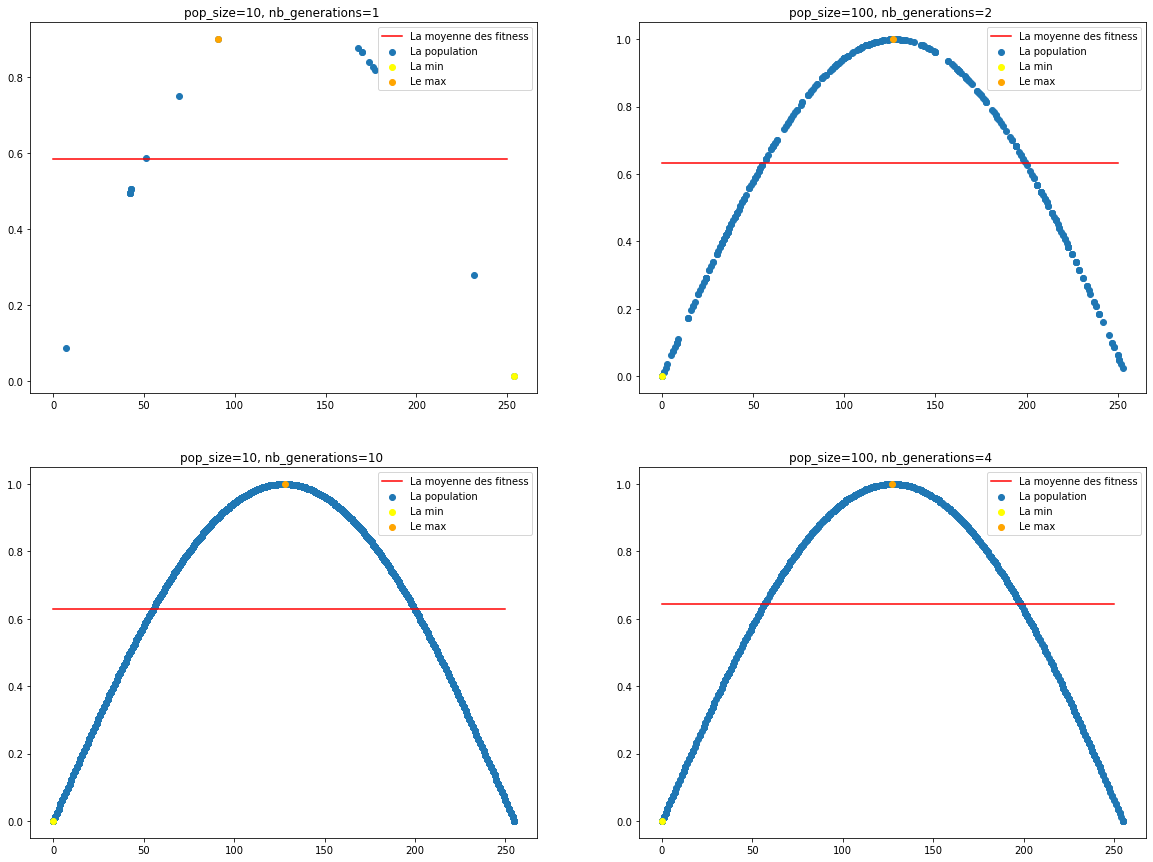

In [47]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
(a,b,c,d,e)=main(pop_size=10, nb_parents=2,nb_generations=1, nb_survivants=20, fonction_=fonction) 
(popu_decimale,fitnesses,moy,min,max)=transformations_supp(a,b,c,d,e)
plt.scatter(popu_decimale , fitnesses, label="La population")
plt.plot([0,250],[moy,moy],c="red", label="La moyenne des fitness")
plt.scatter(min[0],min[1],c="yellow", label="La min")
plt.scatter(max[0],max[1],c="orange", label="Le max")
plt.title("pop_size=10, nb_generations=1 ")
plt.legend()

plt.subplot(2,2,2)
(a,b,c,d,e)=main(pop_size=100, nb_parents=2,nb_generations=2, nb_survivants=20, fonction_=fonction) 
(popu_decimale,fitnesses,moy,min,max)=transformations_supp(a,b,c,d,e)
plt.scatter(popu_decimale , fitnesses, label="La population")
plt.plot([0,250],[moy,moy],c="red", label="La moyenne des fitness")
plt.scatter(min[0],min[1],c="yellow", label="La min")
plt.scatter(max[0],max[1],c="orange", label="Le max")
plt.title("pop_size=100, nb_generations=2 ")
plt.legend()

plt.subplot(2,2,3)
(a,b,c,d,e)=main(pop_size=10, nb_parents=2,nb_generations=10, nb_survivants=20, fonction_=fonction) 
(popu_decimale,fitnesses,moy,min,max)=transformations_supp(a,b,c,d,e)
plt.scatter(popu_decimale , fitnesses, label="La population")
plt.plot([0,250],[moy,moy],c="red", label="La moyenne des fitness")
plt.scatter(min[0],min[1],c="yellow", label="La min")
plt.scatter(max[0],max[1],c="orange", label="Le max")
plt.title("pop_size=10, nb_generations=10 ")
plt.legend()

plt.subplot(2,2,4)
(a,b,c,d,e)=main(pop_size=100, nb_parents=2,nb_generations=4, nb_survivants=20, fonction_=fonction) 
(popu_decimale,fitnesses,moy,min,max)=transformations_supp(a,b,c,d,e)
plt.scatter(popu_decimale , fitnesses, label="La population")
plt.plot([0,250],[moy,moy],c="red", label="La moyenne des fitness")
plt.scatter(min[0],min[1],c="yellow", label="La min")
plt.scatter(max[0],max[1],c="orange", label="Le max")
plt.title("pop_size=100, nb_generations=4 ")
plt.legend()

plt.show()

<h3>Main avec graphiques internes</h3>

In [48]:
import time

In [49]:
#%matplotlib

In [65]:
def main_(pop_size=10, nb_parents=2, nb_generations=2, nb_survivants=20, fonction_=fonction, plage_valeurs=1, binaire=True):
    # Creation de la population
    population_=randpop(pop_size,plage_valeurs)
    
    #Multiplication de la population
    population_generee=copy(population_)
    
    #Creation de la figure interne
    plt.figure(figsize=(10,7))
    #hold(True)
    for i in range(nb_generations): 
        #Selection
        list_select=select(pop_size,nb_parents)
        #Croisements
        population_fille_=offspring(list_select, population_generee)
        array_pop_fille_=numpy.array(population_fille_)
        new_population_=numpy.vstack((population_generee, array_pop_fille_))
        #Mutations
        if(binaire):
            population_muted_=mutation(new_population_)
        else:
            population_muted_=new_population_
        #Mise à jour variables
        population_generee=population_muted_
        pop_size=len(population_generee)
        
        #Forme decimale des individus
        if(binaire):
            popu_decimale=[]
            for i1 in population_generee:
                i1=liste_en_decimale(i1)
                popu_decimale.append(i1)
        else:
            pop_decimale=population_generee

        #Calcul de la fitness
        fitnesses=[]
        for i2 in popu_decimale:
            fitnesses.append(fonction(i2)) 

        fitness_array2=numpy.array(fitnesses)
        
        
        #Tracé à cette itération
    
        plt.figure()
        
        plt.scatter(popu_decimale , fitness_array2, label="La population")
        plt.title("pop_size={}, nb_generations=".format(pop_size)+str(i+1))
        plt.legend()
        #plt.draw()
        plt.show()
        #time.sleep(2.5)
        plt.clf()
        plt.close()
    #plt.show()
    #Les plus forts
    
    les_survivants=survival(population_generee,nb_survivants,fonction_,binaire)
    
    les_survivants_=les_survivants[0]
    les_survivants_fitn=les_survivants[1]
    
    les_survivants_=numpy.array(les_survivants_)
    les_survivants_fitn=numpy.array(les_survivants_fitn)
    
    pop_sansduplicata_maskbool_=eliminate_duplicates(les_survivants_)
    
    pop_sansduplicata_=les_survivants_[pop_sansduplicata_maskbool_]
    
    fitness_pop_sansduplicata_=les_survivants_fitn[pop_sansduplicata_maskbool_]
    
    #Les plus faibles
    
    les_survivants2=survival_(population_generee,nb_survivants,fonction_,binaire)
    
    les_survivants_2=les_survivants2[0]
    les_survivants_fitn2=les_survivants2[1]
    
    les_survivants_2=numpy.array(les_survivants_2)
    les_survivants_fitn2=numpy.array(les_survivants_fitn2)
    
    pop_sansduplicata_maskbool_2=eliminate_duplicates(les_survivants_2)
    
    pop_sansduplicata_2=les_survivants_2[pop_sansduplicata_maskbool_2]
    
    fitness_pop_sansduplicata_2=les_survivants_fitn2[pop_sansduplicata_maskbool_2]
    
    return (pop_sansduplicata_,fitness_pop_sansduplicata_,pop_sansduplicata_2,fitness_pop_sansduplicata_2,population_generee)

<Figure size 720x504 with 0 Axes>

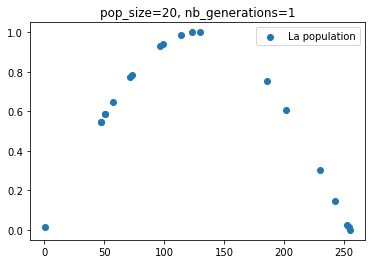

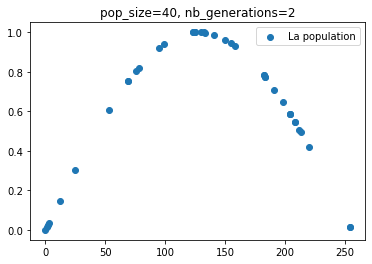

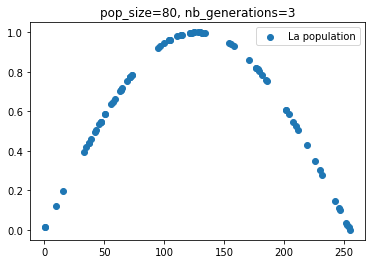

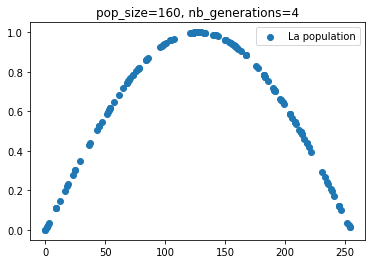

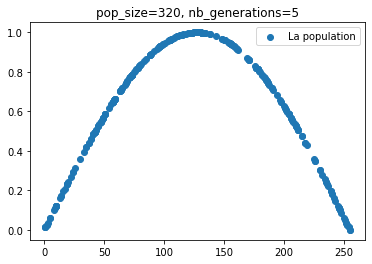

In [66]:
(a,b,c,d,e)=main_(pop_size=10, nb_parents=2,nb_generations=5, nb_survivants=20, fonction_=fonction) 

<h3>Main des meilleurs</h3>

In [59]:
def main__(pop_size=10, nb_parents=2, nb_generations=2, nb_survivants=20, fonction_=fonction, plage_valeurs=1, binaire=True):
    # Creation de la population
    population_=randpop(pop_size,plage_valeurs)
    
    #Multiplication de la population
    population_generee=copy(population_)
    
    #Creation de la figure interne
    plt.figure(figsize=(10,7))
    #hold(True)
    for i in range(nb_generations): 
        #Selection
        list_select=select(pop_size,nb_parents)
        #Croisements
        population_fille_=offspring(list_select, population_generee)
        array_pop_fille_=numpy.array(population_fille_)
        new_population_=numpy.vstack((population_generee, array_pop_fille_))
        #Mutations
        if(binaire):
            population_muted_=mutation(new_population_)
        else:
            population_muted_=new_population_
            
        #Mise à jour variables
        les_survivants=survival(population_muted_,nb_survivants,fonction_,binaire)
        population_generee=les_survivants[0]
        pop_size=len(population_generee)
        
        #Forme decimale des individus
        if(binaire):
            popu_decimale=[]
            for i1 in population_muted_:
                i1=liste_en_decimale(i1)
                popu_decimale.append(i1)
        else:
            pop_decimale=population_muted_

        #Calcul de la fitness
        fitnesses=[]
        for i2 in popu_decimale:
            fitnesses.append(fonction(i2)) 

        fitness_array2=numpy.array(fitnesses)
        
        
        #Tracé à cette itération
    
        plt.figure()
        
        plt.scatter(popu_decimale , fitness_array2, label="La population")
        plt.title("pop_size=100, nb_generations=4 ")
        plt.legend()
        #plt.draw()
        plt.show()
        #time.sleep(2.5)
        plt.clf()
        plt.close()
        #plt.show()

<Figure size 720x504 with 0 Axes>

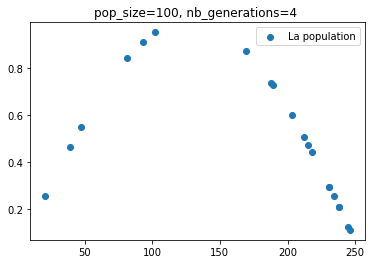

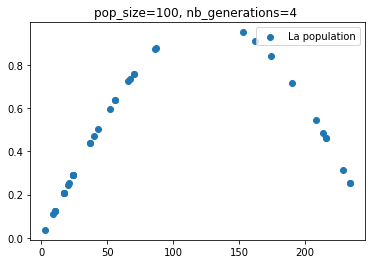

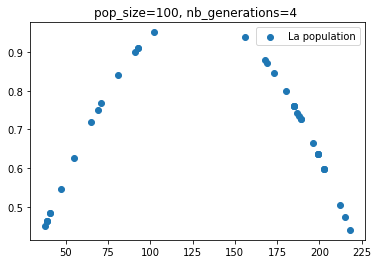

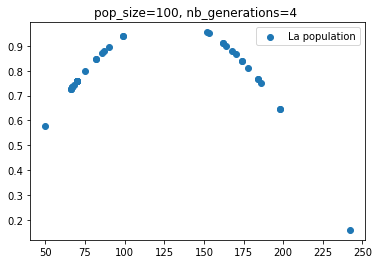

In [62]:
main__(pop_size=10, nb_parents=2,nb_generations=3, nb_survivants=20, fonction_=fonction) 